In [ ]:
import os
import yolov5
import cv2
import matplotlib.pyplot as plt
import nbimporter 
import numpy as np
from image_cropping import *
import pygame
from pathlib import Path

In [ ]:
SAMPLE_ID = 4
IMAGE_PATH = f'data/images/plate.{SAMPLE_ID}.png'



In [39]:
#### MARLON
 
SAMPLE_ID = 5

# Load all german license plates 
plates = []
path_license_plates = Path('/Users/marlon/Desktop/sem/vs/vs_proj/VCS_Project/data/actual')
plates.extend(list(path_license_plates.glob('*.jpg')))


# For testing purposes, select some random license plates
IMAGE_PATH = str(plates[SAMPLE_ID])

assert os.path.exists(IMAGE_PATH), f"Image not found at {IMAGE_PATH}"

In [35]:
# Load model
model = yolov5.load('keremberke/yolov5m-license-plate')
  
# Set model parameters
model.conf = 0.10  # NMS confidence threshold
model.iou = 0.45  # NMS IoU threshold
model.agnostic = False  # NMS class-agnostic
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # maximum number of detections per image

In [40]:
# Perform inference with test-time augmentation
results = model(IMAGE_PATH, augment=True)

# Parse results
predictions = results.pred[0]
boxes = predictions[:, :4]  # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

# Load the image
image = cv2.imread(IMAGE_PATH)
if image is None:
    raise ValueError(f"Image not found at path: {IMAGE_PATH}")
image = image.copy()  # Ensure it's writable

# Draw bounding boxes on the image
for box, score, category in zip(boxes, scores, categories):
    x1, y1, x2, y2 = map(int, box)
    label = f"ID {int(category)}: {score:.2f}"
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

/Users/marlon/Desktop/sem/vs/vs_proj/vs_project_ve/lib/python3.9/site-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Found 1 license plates in the image
--------------------------------------------------------------------------------
Saved manually drawn predictions to results/predictions/predictions.5.png


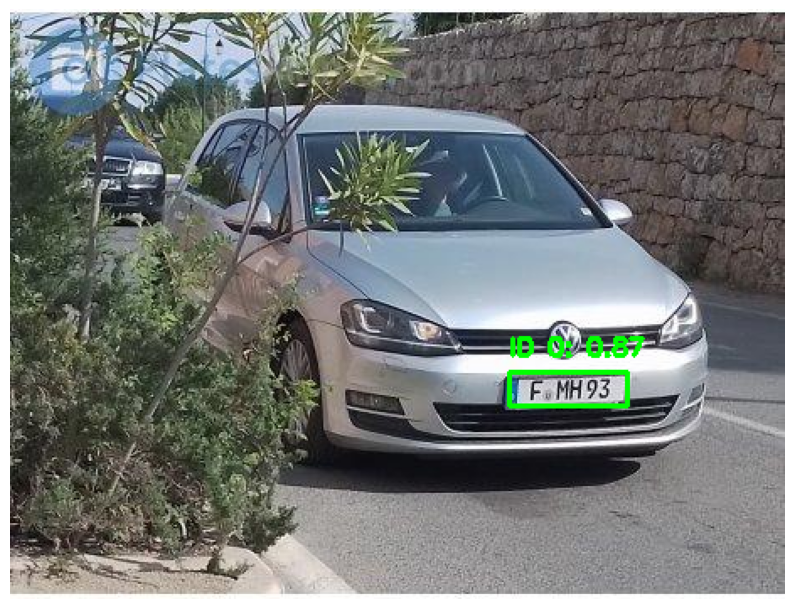

In [41]:
%matplotlib inline

license_plate_detected = len(boxes) > 0

if not license_plate_detected:
    print("No license plates found, the image needs manual inspection")
    os.makedirs('results/FOR_MANUAL_INSPECTION', exist_ok=True)
    output_path = f'results/FOR_MANUAL_INSPECTION/predictions.{SAMPLE_ID}.png'
    cv2.imwrite(output_path, image)
    print("-"*80)
    print(f"Saved manually drawn predictions to {output_path}")
else:
    print(f"Found {len(boxes)} license plates in the image")
    os.makedirs('results/predictions', exist_ok=True)
    output_path = f'results/predictions/predictions.{SAMPLE_ID}.png'
    cv2.imwrite(output_path, image)
    print("-"*80)
    print(f"Saved manually drawn predictions to {output_path}")


# Display the image using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

---------------------------------------------------------------------------
Saved cropped license plate to results/license_plates/license_plate.5.png


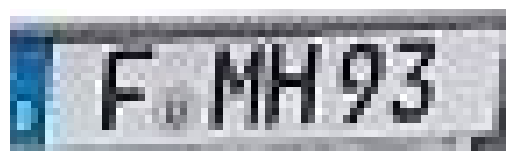

In [42]:
%matplotlib inline

if license_plate_detected:    
    # Load the image and show the cropped license plate
    image = cv2.imread(IMAGE_PATH)
    license_plate = image[int(boxes[0][1]):int(boxes[0][3]), int(boxes[0][0]):int(boxes[0][2])]

    # Create a new folder "results/license_plates" if it does not exist
    if not os.path.exists('results/license_plates'):
        os.makedirs('results/license_plates')
        
    # Save the cropped license plate to "results/license_plates" folder
    cv2.imwrite(f'results/license_plates/license_plate.{SAMPLE_ID}.png', license_plate)
    print("-"*75)
    print(f"Saved cropped license plate to results/license_plates/license_plate.{SAMPLE_ID}.png")

    # Display the cropped license plate
    plt.imshow(cv2.cvtColor(license_plate, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    screen, px = setup(IMAGE_PATH)
    left, upper, right, lower = mainLoop(screen, px)

    # ensure output rect always has positive width, height
    if right < left:
        left, right = right, left
    if lower < upper:
        lower, upper = upper, lower
    im = Image.open(IMAGE_PATH)
    im = im.crop(( left, upper, right, lower))
    pygame.display.quit()
    im.save(f'results/license_plates/license_plate.{SAMPLE_ID}.png')
    print("-"*75)
    print(f"Saved cropped license plate to results/license_plates/license_plate.{SAMPLE_ID}.png")
    
    plt.imshow(cv2.cvtColor(np.array(im), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()